In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import GridSearchCV, train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score,root_mean_squared_error
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor 
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
import optuna
import joblib

In [3]:
data = pd.read_csv("EDA+Preprocessing+Dashboard.csv")

In [4]:
data.head()

,contest-tmp2m-14d__tmp2m,contest-wind-h100-14d__wind-hgt-100,contest-wind-h500-14d__wind-hgt-500,contest-pevpr-sfc-gauss-14d__pevpr,wind-hgt-500-2010-1,wind-hgt-100-2010-1,wind-uwnd-925-2010-1,wind-hgt-10-2010-1,wind-vwnd-925-2010-1,wind-hgt-850-2010-1,nmme0-tmp2m-34w__nmme0mean,nmme-tmp2m-56w__nmmemean,nmme-prate-34w__nmmemean,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__nmme0mean,nmme-prate-56w__nmmemean,nmme-tmp2m-34w__nmmemean,nmme0mean
0,28.744480,16666.81,5899.66,237.00,-7267.97,-25749.70,143.64,-72427.68,-107.46,-2277.72,30.46,28.11,24.02,9.54,14.19,24.43,28.17,30.65
1,28.370585,16667.31,5901.03,228.90,-7189.77,-25474.37,143.41,-70659.22,-105.73,-2287.34,30.46,28.11,24.02,9.54,14.19,24.43,28.17,30.65
2,28.133059,16668.39,5902.18,220.69,-7090.19,-25200.29,145.35,-68699.81,-102.51,-2295.33,30.46,28.11,24.02,9.54,14.19,24.43,28.17,30.65
3,28.256798,16667.39,5903.07,225.28,-6914.23,-24789.70,146.90,-66588.29,-96.11,-2263.73,30.46,28.11,24.02,9.54,14.19,24.43,28.17,30.65
4,28.372353,16665.65,5903.36,237.24,-6652.36,-24181.96,148.67,-64311.30,-89.19,-2198.01,30.46,28.11,24.02,9.54,14.19,24.43,28.17,30.65


In [5]:
data.describe()

,contest-tmp2m-14d__tmp2m,contest-wind-h100-14d__wind-hgt-100,contest-wind-h500-14d__wind-hgt-500,contest-pevpr-sfc-gauss-14d__pevpr,wind-hgt-500-2010-1,wind-hgt-100-2010-1,wind-uwnd-925-2010-1,wind-hgt-10-2010-1,wind-vwnd-925-2010-1,wind-hgt-850-2010-1,nmme0-tmp2m-34w__nmme0mean,nmme-tmp2m-56w__nmmemean,nmme-prate-34w__nmmemean,nmme0-prate-56w__nmme0mean,nmme0-prate-34w__nmme0mean,nmme-prate-56w__nmmemean,nmme-tmp2m-34w__nmmemean,nmme0mean
count,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000,352604.000000
mean,11.420598,16393.486856,5722.214414,268.756935,-839.874781,504.414665,-16.376472,6177.518367,10.038076,168.884475,10.739443,10.658814,27.289031,25.973786,26.049928,27.821247,10.825135,10.595677
std,9.945258,196.524612,124.470616,200.025342,9043.070327,28144.223614,155.054250,86993.750403,121.106852,2973.271321,10.417330,10.892029,16.567273,16.554133,16.597601,16.620146,10.868456,10.270547
min,-20.358963,15750.120000,5289.250000,-2.310000,-16618.830000,-43116.090000,-278.540000,-119477.750000,-181.210000,-4583.990000,-14.680000,-15.370000,0.210000,0.060000,0.060000,0.240000,-14.260000,-14.680000
25%,4.284578,16244.120000,5637.790000,95.620000,-9867.320000,-26555.660000,-168.670000,-80983.630000,-106.650000,-2454.350000,2.190000,1.640000,16.200000,15.120000,15.100000,16.590000,1.840000,2.190000
50%,11.529958,16362.745000,5723.270000,234.570000,772.705000,282.030000,-22.920000,5905.915000,8.605000,610.545000,10.080000,9.870000,23.830000,22.160000,22.230000,24.460000,10.080000,10.050000
75%,19.175051,16572.040000,5818.810000,412.950000,7441.260000,29632.000000,127.980000,97407.290000,127.600000,2632.070000,19.290000,19.870000,35.390000,33.660000,33.860000,35.920000,20.070000,18.880000
max,37.238782,16762.800000,5958.200000,1185.140000,12566.520000,40733.880000,245.000000,137617.360000,215.810000,6134.240000,34.880000,35.170000,124.550000,125.620000,125.620000,124.550000,35.170000,34.880000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 352604 entries, 0 to 352603
Data columns (total 18 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   contest-tmp2m-14d__tmp2m             352604 non-null  float64
 1   contest-wind-h100-14d__wind-hgt-100  352604 non-null  float64
 2   contest-wind-h500-14d__wind-hgt-500  352604 non-null  float64
 3   contest-pevpr-sfc-gauss-14d__pevpr   352604 non-null  float64
 4   wind-hgt-500-2010-1                  352604 non-null  float64
 5   wind-hgt-100-2010-1                  352604 non-null  float64
 6   wind-uwnd-925-2010-1                 352604 non-null  float64
 7   wind-hgt-10-2010-1                   352604 non-null  float64
 8   wind-vwnd-925-2010-1                 352604 non-null  float64
 9   wind-hgt-850-2010-1                  352604 non-null  float64
 10  nmme0-tmp2m-34w__nmme0mean           352604 non-null  float64
 11  nmme-tmp2m-56

## Training and validate data

In [4]:
x = data.copy()
x = x.drop(columns = 'contest-tmp2m-14d__tmp2m')
y = data['contest-tmp2m-14d__tmp2m']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.4, random_state=0)
x_train, x_val, y_train, y_val = train_test_split(x_train,y_train, test_size=0.2,random_state=0)

# Baseline Model (RandomForest Regression)

In [34]:
rf = RandomForestRegressor(n_estimators=100, random_state=0, n_jobs=-1)
rf.fit(x_train,y_train)
y_pred = rf.predict(x_test)

print('RMSE: ',root_mean_squared_error(y_test,y_pred))
print('MAE: ', mean_absolute_error(y_test,y_pred))
print('R2_Score: ',r2_score(y_test,y_pred))

RMSE:  0.6745790436572183
MAE:  0.4673240711478968
R2_Score:  0.9953855737745445


## XGBoost

In [11]:
def objective_xgb(trial):

    param = {
        "objective": "reg:squarederror",
        "max_depth": trial.suggest_int("max_depth", 3,12),
        "min_child_weight": trial.suggest_int("min_child_weight", 1,20),
        "learning_rate": trial.suggest_float("learning_rate", 1e-3, 0.3),
        "n_estimators": trial.suggest_int("n_estimators",100,1000),
        "subsample": trial.suggest_float("subsample", 0.5,1)
    }

    model = XGBRegressor(**param)
    
    
    neg_rmse_scores = cross_val_score(model,x_train,y_train, cv = 5, scoring= "neg_root_mean_squared_error")
    rmse_mean = -neg_rmse_scores.mean() 
    return rmse_mean

In [12]:

study = optuna.create_study(direction='minimize')
study.optimize(objective_xgb, n_trials=100)

[I 2025-09-23 17:56:35,567] A new study created in memory with name: no-name-53ae464a-1f43-4fda-abc1-f38a7125e9e9
[I 2025-09-23 17:56:52,203] Trial 0 finished with value: 0.9809783681309139 and parameters: {'max_depth': 4, 'min_child_weight': 4, 'learning_rate': 0.2653075519203314, 'n_estimators': 972, 'subsample': 0.9462939538048306}. Best is trial 0 with value: 0.9809783681309139.
[I 2025-09-23 17:57:23,484] Trial 1 finished with value: 0.5876691770631364 and parameters: {'max_depth': 11, 'min_child_weight': 11, 'learning_rate': 0.18479586356169422, 'n_estimators': 363, 'subsample': 0.8309342637434408}. Best is trial 1 with value: 0.5876691770631364.
[I 2025-09-23 17:57:51,723] Trial 2 finished with value: 1.218757936989444 and parameters: {'max_depth': 3, 'min_child_weight': 20, 'learning_rate': 0.29347171853558335, 'n_estimators': 888, 'subsample': 0.5751095891290482}. Best is trial 1 with value: 0.5876691770631364.
[I 2025-09-23 17:58:07,088] Trial 3 finished with value: 1.4057689

In [24]:
best_params = study.best_params
best_rmse = study.best_value
print(best_params)
print('RMSE: ',best_rmse)

{'max_depth': 12, 'min_child_weight': 7, 'learning_rate': 0.08938563397003414, 'n_estimators': 961, 'subsample': 0.8693208695555897}
RMSE:  0.5028290316285883


In [26]:
best_params_xgb = {
    'max_depth': 12,
    'min_child_weight': 7,
    'learning_rate': 0.08938563397003414, 
    'n_estimators': 961, 
    'subsample': 0.8693208695555897
}

In [35]:
model_xgb = XGBRegressor(**best_params_xgb)

In [36]:
model_xgb.fit(x_train,y_train)

,objective,'reg:squarederror'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,None


In [37]:
y_pred_xgb = model_xgb.predict(x_test)

In [38]:
print('RMSE: ',root_mean_squared_error(y_test,y_pred_xgb))
print('MAE: ', mean_absolute_error(y_test,y_pred_xgb))
print('R2_Score: ',r2_score(y_test,y_pred_xgb))

RMSE:  0.4534408112893934
MAE:  0.3189473011425954
R2_Score:  0.9979150616033998


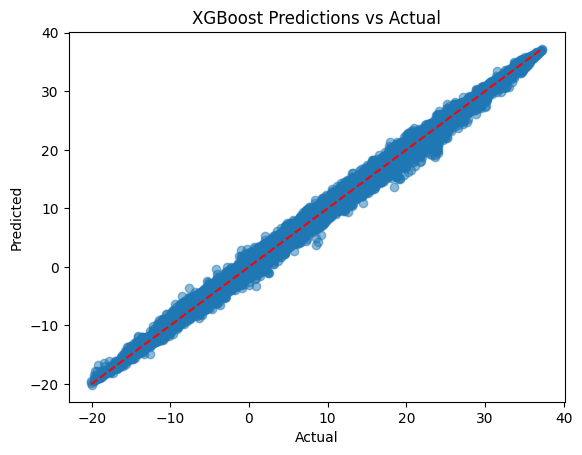

In [39]:
plt.scatter(y_test, y_pred_xgb, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("XGBoost Predictions vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()

## CatBoost

In [16]:
def objective_catboost (trial):

  param = {
    'iterations' : trial.suggest_int('iterations', 100,1000),
    'learning_rate': trial.suggest_float('learning_rate', 0.01,0.1),
    'l2_leaf_reg': trial.suggest_float('l2_leaf_reg', 1,5),
    'depth': trial.suggest_int('depth', 3,10),
    'border_count': trial.suggest_int('border_count', 100,500),
    'verbose': 0
  }

  catb = CatBoostRegressor(**param)

  neg_rmse_scores = cross_val_score(catb,x_train,y_train, cv = 5, scoring= "neg_root_mean_squared_error")
  rmse_mean = -neg_rmse_scores.mean() 

  return rmse_mean

In [ ]:
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective_catboost, n_trials=50)

In [32]:
best_params = study_catboost.best_params
best_rmse = study_catboost.best_value
print(best_params)
print ('RMSE: ', best_rmse)

{'iterations': 995, 'learning_rate': 0.0809953565389888, 'l2_leaf_reg': 4.200510806007983, 'depth': 10, 'border_count': 338}
RMSE:  0.8739132064876483


In [18]:
best_params_catboost = {
    'iterations': 995,
    'learning_rate': 0.0809953565389888,
    'l2_leaf_reg': 4.200510806007983,
    'depth': 10,
    'border_count': 338
}

In [19]:
model_catboost = CatBoostRegressor(**best_params_catboost)

In [20]:
model_catboost.fit(x_train, y_train)

0:	learn: 9.2441229	total: 69.8ms	remaining: 1m 9s
1:	learn: 8.5797030	total: 140ms	remaining: 1m 9s
2:	learn: 7.9746299	total: 205ms	remaining: 1m 7s
3:	learn: 7.4203448	total: 270ms	remaining: 1m 6s
4:	learn: 6.9147866	total: 341ms	remaining: 1m 7s
5:	learn: 6.4518075	total: 410ms	remaining: 1m 7s
6:	learn: 6.0317480	total: 481ms	remaining: 1m 7s
7:	learn: 5.6432537	total: 548ms	remaining: 1m 7s
8:	learn: 5.2938996	total: 618ms	remaining: 1m 7s
9:	learn: 4.9712359	total: 691ms	remaining: 1m 8s
10:	learn: 4.6805986	total: 764ms	remaining: 1m 8s
11:	learn: 4.4199389	total: 823ms	remaining: 1m 7s
12:	learn: 4.1856730	total: 883ms	remaining: 1m 6s
13:	learn: 3.9705407	total: 936ms	remaining: 1m 5s
14:	learn: 3.7737447	total: 990ms	remaining: 1m 4s
15:	learn: 3.6018070	total: 1.04s	remaining: 1m 3s
16:	learn: 3.4395567	total: 1.1s	remaining: 1m 3s
17:	learn: 3.2937447	total: 1.15s	remaining: 1m 2s
18:	learn: 3.1667445	total: 1.21s	remaining: 1m 2s
19:	learn: 3.0498090	total: 1.27s	remaini

In [21]:
y_pred_catboost = model_catboost.predict(x_test)
print(y_pred_catboost)

[25.52161036  0.28841233 10.04649736 ...  6.92021278  5.98979073
 -6.19441393]


In [22]:
print('RMSE: ',root_mean_squared_error(y_test,y_pred_catboost))
print('MAE: ', mean_absolute_error(y_test,y_pred_catboost))
print('R2_Score: ',r2_score(y_test,y_pred_catboost))

RMSE:  0.8604413203703972
MAE:  0.6536034683567304
R2_Score:  0.9924925139770158


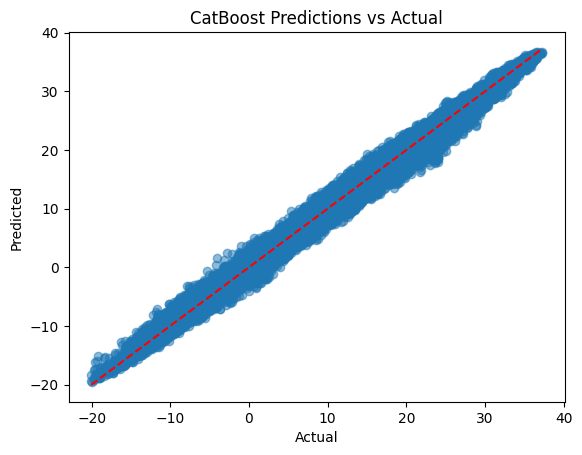

In [23]:
plt.scatter(y_test, y_pred_catboost, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("CatBoost Predictions vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()

## Lgbm

In [7]:
def objective_lgbm (trial):

  param = {
    
        'objective': 'regression',
        'n_estimators': trial.suggest_int('n_estimators', 100, 2000),
        'learning_rate': trial.suggest_float('learning_rate', 1e-3, 0.3, log=True),
        'lambda_l1': trial.suggest_float('lambda_l1', 1e-8, 10.0, log=True),
        'lambda_l2': trial.suggest_float('lambda_l2', 1e-8, 10.0, log=True),
        'num_leaves': trial.suggest_int('num_leaves', 2, 256),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'feature_fraction': trial.suggest_float('feature_fraction', 0.4, 1.0),
        'bagging_fraction': trial.suggest_float('bagging_fraction', 0.4, 1.0),
        'bagging_freq': trial.suggest_int('bagging_freq', 1, 7),
        'random_state': 42,
        'verbose': -1,
        'n_jobs': -1
    }
  lgbm = LGBMRegressor(**param)

  neg_rmse_scores = cross_val_score(lgbm,x_train,y_train, cv = 5, scoring= "neg_root_mean_squared_error")
  rmse_mean = -neg_rmse_scores.mean() 

  return rmse_mean

In [ ]:
study_lgbm = optuna.create_study(direction='minimize')
study_lgbm.optimize(objective_lgbm, n_trials=50)

[I 2025-09-24 01:58:55,589] A new study created in memory with name: no-name-0f10417a-c1d7-4f46-8ace-e4b775cd6eaa
[I 2025-09-24 01:59:07,154] Trial 0 finished with value: 1.0109415929445564 and parameters: {'n_estimators': 189, 'learning_rate': 0.08918094723899544, 'lambda_l1': 7.010507453076834e-05, 'lambda_l2': 2.4391370862732884e-08, 'num_leaves': 118, 'min_child_samples': 72, 'feature_fraction': 0.9717433666072155, 'bagging_fraction': 0.6910424386134315, 'bagging_freq': 7}. Best is trial 0 with value: 1.0109415929445564.
[I 2025-09-24 02:05:40,479] Trial 1 finished with value: 1.1215024790134713 and parameters: {'n_estimators': 1677, 'learning_rate': 0.009777058396646813, 'lambda_l1': 1.0887752288017624e-05, 'lambda_l2': 0.0017070250022580918, 'num_leaves': 76, 'min_child_samples': 53, 'feature_fraction': 0.8423350073960026, 'bagging_fraction': 0.9383608356167058, 'bagging_freq': 2}. Best is trial 0 with value: 1.0109415929445564.
[I 2025-09-24 02:07:18,809] Trial 2 finished with v

In [ ]:
best_params = study_lgbm.best_params
best_rmse = study_lgbm.best_value
print(best_params)
print ('RMSE: ', best_rmse)

{'n_estimators': 1701, 'learning_rate': 0.08716246654023649, 'lambda_l1': 1.1376126277560636, 'lambda_l2': 1.3357105198342501e-08, 'num_leaves': 255, 'min_child_samples': 50, 'feature_fraction': 0.9352228066368276, 'bagging_fraction': 0.9283983812774348, 'bagging_freq': 4}
RMSE:  0.46442335478751334


In [10]:
model_lgbm = LGBMRegressor(**best_params)

In [11]:
model_lgbm.fit(x_train, y_train)

,boosting_type,'gbdt'
,num_leaves,255
,max_depth,-1
,learning_rate,0.08716246654023649
,n_estimators,1701
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,50


In [12]:
y_pred_lgbm = model_lgbm.predict(x_test)
print(y_pred_lgbm)

[25.15384782  1.09615141  9.69047794 ...  6.9935974   5.76358766
 -5.48736044]


In [13]:
print('RMSE: ',root_mean_squared_error(y_test,y_pred_lgbm))
print('MAE: ', mean_absolute_error(y_test,y_pred_lgbm))
print('R2_Score: ',r2_score(y_test,y_pred_lgbm))

RMSE:  0.423157837626193
MAE:  0.30483818279458375
R2_Score:  0.9981842468986513


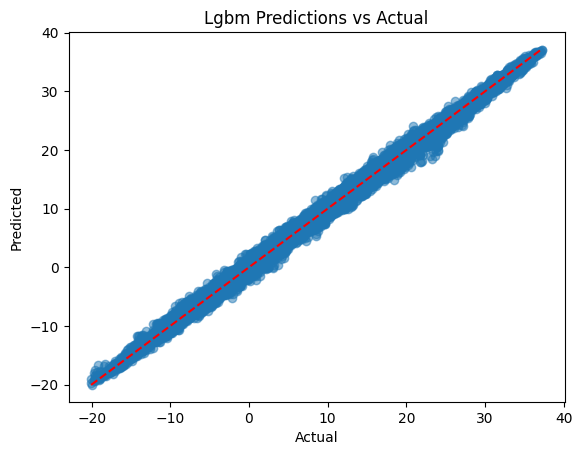

In [14]:
plt.scatter(y_test, y_pred_lgbm, alpha=0.5)
plt.xlabel("Actual")
plt.ylabel("Predicted")
plt.title("Lgbm Predictions vs Actual")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--') 
plt.show()

      Model      RMSE       MAE        R2
0   XGBoost  0.453441  0.318947  0.997915
1  CatBoost  0.860441  0.653603  0.992493
2      LGBM  0.423158  0.304838  0.998184


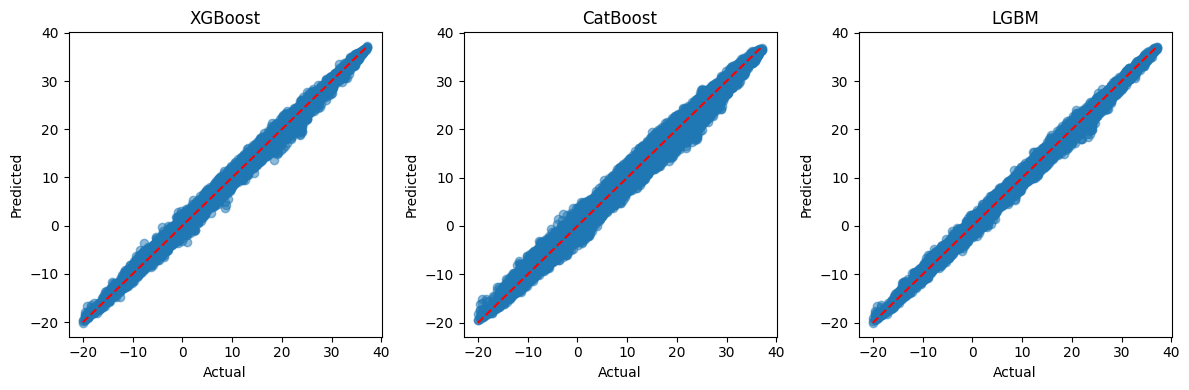

In [40]:
predictions = {
    "XGBoost": y_pred_xgb,
    "CatBoost": y_pred_catboost,  
    "LGBM": y_pred_lgbm
}


metrics = []
for name, y_pred in predictions.items():
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    metrics.append([name, rmse, mae, r2])


df_metrics = pd.DataFrame(metrics, columns=["Model", "RMSE", "MAE", "R2"])
print(df_metrics)


plt.figure(figsize=(12,4))
for i, (name, y_pred) in enumerate(predictions.items(), 1):
    plt.subplot(1,3,i)
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
    plt.title(name)
    plt.xlabel("Actual")
    plt.ylabel("Predicted")
plt.tight_layout()
plt.show()

In [46]:
joblib.dump(model_xgb, "final_model_xgb.pkl")

['final_model_xgb.pkl']

In [47]:
joblib.dump(model_catboost, "final_model_catboost.pkl")


['final_model_catboost.pkl']

In [48]:
joblib.dump(model_lgbm, "final_model_lgbm.pkl")

['final_model_lgbm.pkl']